In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "nsl_kdd"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
import pandas as pd
import numpy as np
import umap
from matplotlib import pyplot as plt
# %matplotlib widget

import tensorflow as tf
from tensorflow.keras import layers as k_layers

from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.manifold import TSNE

import time
from pprint import pprint
from data_utils import *

import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

In [27]:
RUN_ALGORITHMS = False

In [28]:
(X_train, X_test, Y_train, Y_test), attack_classes = load_train_test_data(pwd=pwd, return_classes=True, standardize=True, norm=False, include_categorical=False)

# TSNE

In [29]:
X = np.vstack([X_train, X_test])
Y = np.vstack([Y_train, Y_test])
nsl_lables = np.argmax(Y[:], axis=1)

In [30]:
titles_tsne_nsl = [
    'perplexity=5',
    'perplexity=30',
    'perplexity=80',
    'perplexity=120',
    'perplexity=160'
]

if RUN_ALGORITHMS:
    tsne_list_nsl = [
        TSNE(perplexity=5, n_components=2, random_state=42),
        TSNE(perplexity=30, n_components=2, random_state=42),
        TSNE(perplexity=80, n_components=2, random_state=42),
        TSNE(perplexity=120, n_components=2, random_state=42),
        TSNE(perplexity=160, n_components=2, random_state=42)
    ]

    X_nsl_tsne = []
    for i, tsne in enumerate(tsne_list_nsl):
        print(f'Starting {titles_tsne_nsl[i]}, ', end='')
        X_nsl_tsne.append(run_and_measure(tsne.fit_transform, X))

    np.save(pwd + '/data/saved_X/X_nsl_tsne_without_categorical.npy', np.array(X_nsl_tsne))

else:
    X_nsl_tsne = np.load(pwd + '/data/saved_X/X_nsl_tsne_without_categorical.npy')

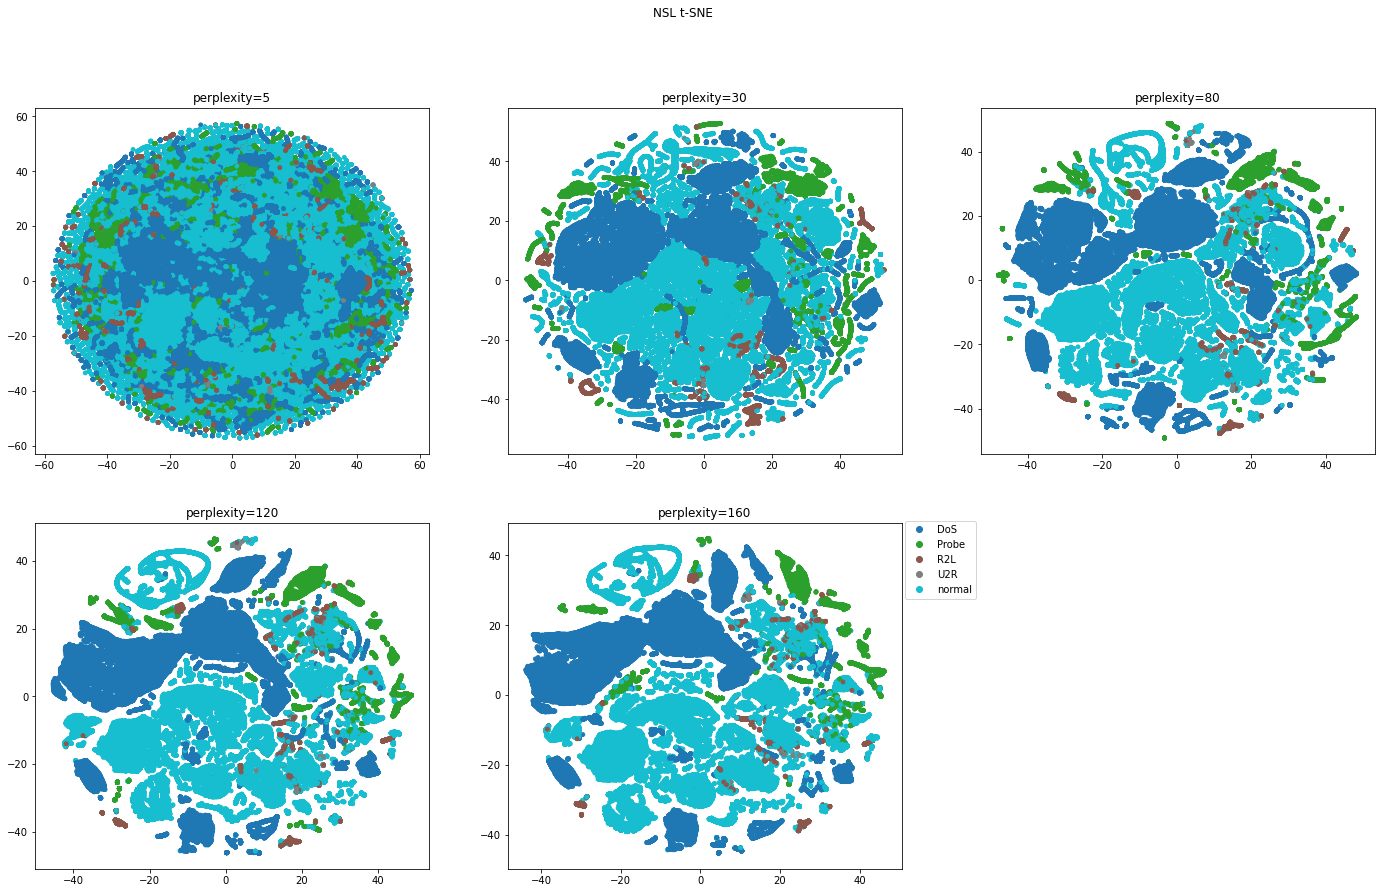

In [31]:
plot_2d(X_nsl_tsne, nsl_lables, titles_tsne_nsl, 'NSL t-SNE', labels=attack_classes, bbox_shift=1.2, rows=2, figsize=(24, 14))

# UMAP

In [32]:
titles_umap_nsl = [
    'n_neighbors=4',
    'n_neighbors=15',
    'n_neighbors=60',
    'n_neighbors=100',
    'n_neighbors=140'
]

if RUN_ALGORITHMS:
    umap_list_nsl = [
        umap.UMAP(n_neighbors=4, n_components=2, random_state=42),
        umap.UMAP(n_neighbors=15, n_components=2, random_state=42),
        umap.UMAP(n_neighbors=60, n_components=2, random_state=42),
        umap.UMAP(n_neighbors=100, n_components=2, random_state=42),
        umap.UMAP(n_neighbors=140, n_components=2, random_state=42)
    ]

    X_nsl_umap = []
    for i, umap_model in enumerate(umap_list_nsl):
        print(f'Starting {titles_umap_nsl[i]}, ', end='')
        X_nsl_umap.append(run_and_measure(umap_model.fit_transform, X))

    np.save(pwd + '/data/saved_X/X_nsl_umap_without_categorical.npy', np.array(X_nsl_umap))

else:
    X_nsl_umap = np.load(pwd + '/data/saved_X/X_nsl_umap_without_categorical.npy')

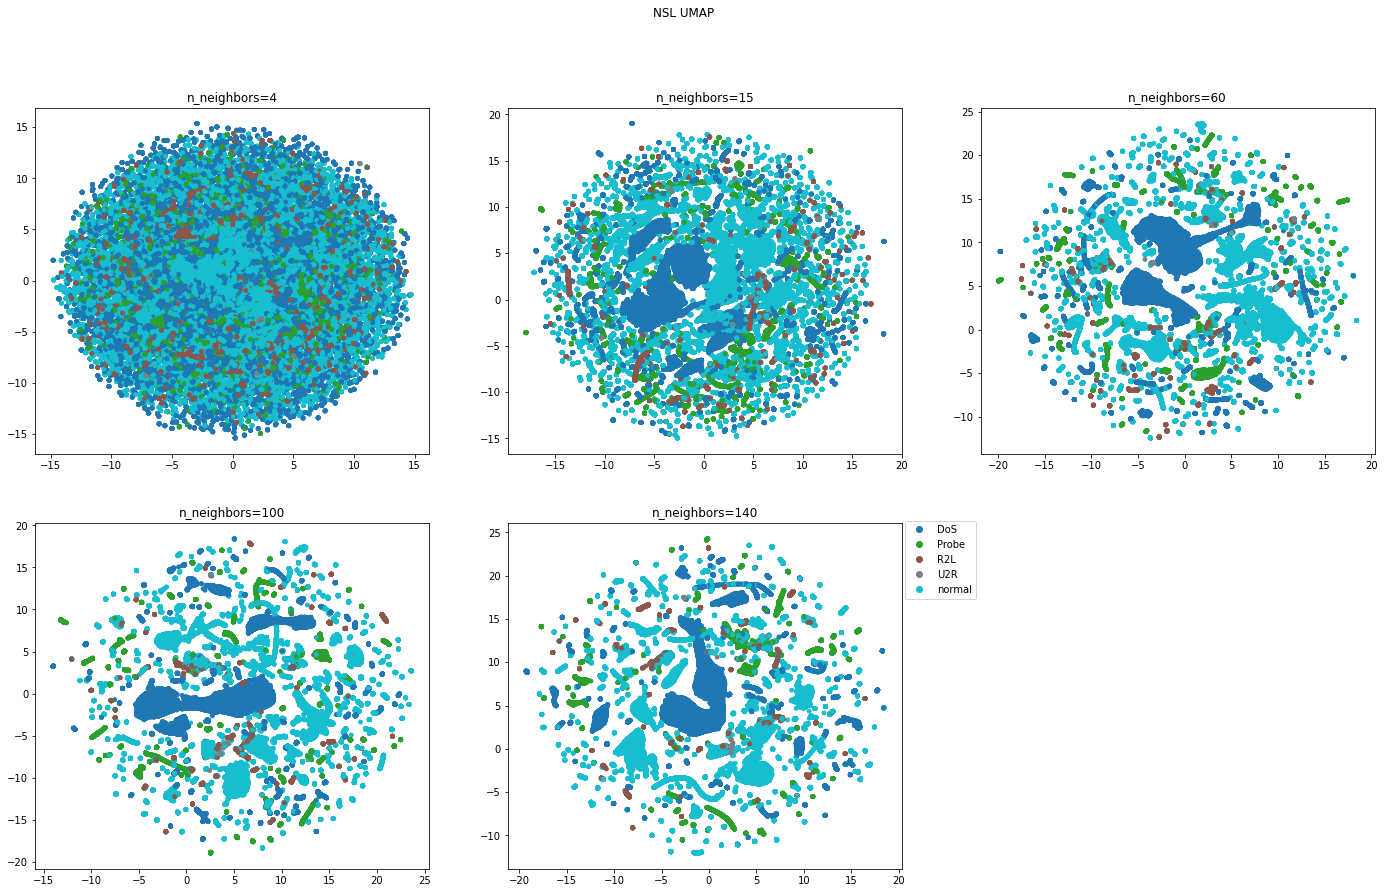

In [33]:
plot_2d(X_nsl_umap, nsl_lables, titles_umap_nsl, 'NSL UMAP', labels=attack_classes, bbox_shift=1.2, rows=2, figsize=(24, 14))

# LARGE VIS

In [34]:
perp = [25, 50, 75, 100, 140]
neigh = [x*3 for x in perp]

titles_largevis_nsl = [
    'perp=25 neigh=75',
    'perp=50 neigh=150',
    'perp=75 neigh=225',
    'perp=100 neigh=300',
    'perp=140 neigh=420'
]
path = pwd + "/data/points/nsl_points_without_categorical.txt"

In [35]:
if RUN_ALGORITHMS:
    write_to_file(X, path)
    X_nsl_largevis = []
    for p,n in zip(perp, neigh):
        !{pwd}/LargeVis -input {pwd}/data/points/nsl_points_without_categorical.txt -perp $p -neigh $n -output {pwd}/data/after_largevis/after_largevis_without_categorical_nsl_$p\_$n\.txt
        df = pd.read_csv(pwd + f"/data/after_largevis/after_largevis_without_categorical_nsl_{p}_{n}.txt", sep=' ', header=None)
        X_nsl_largevis.append(df.values[1:])
    np.save(pwd + '/data/saved_X/X_nsl_without_categorical_largevis.npy', np.array(X_nsl_largevis))
else:
    X_nsl_largevis = np.load(pwd + '/data/saved_X/X_nsl_without_categorical_largevis.npy')

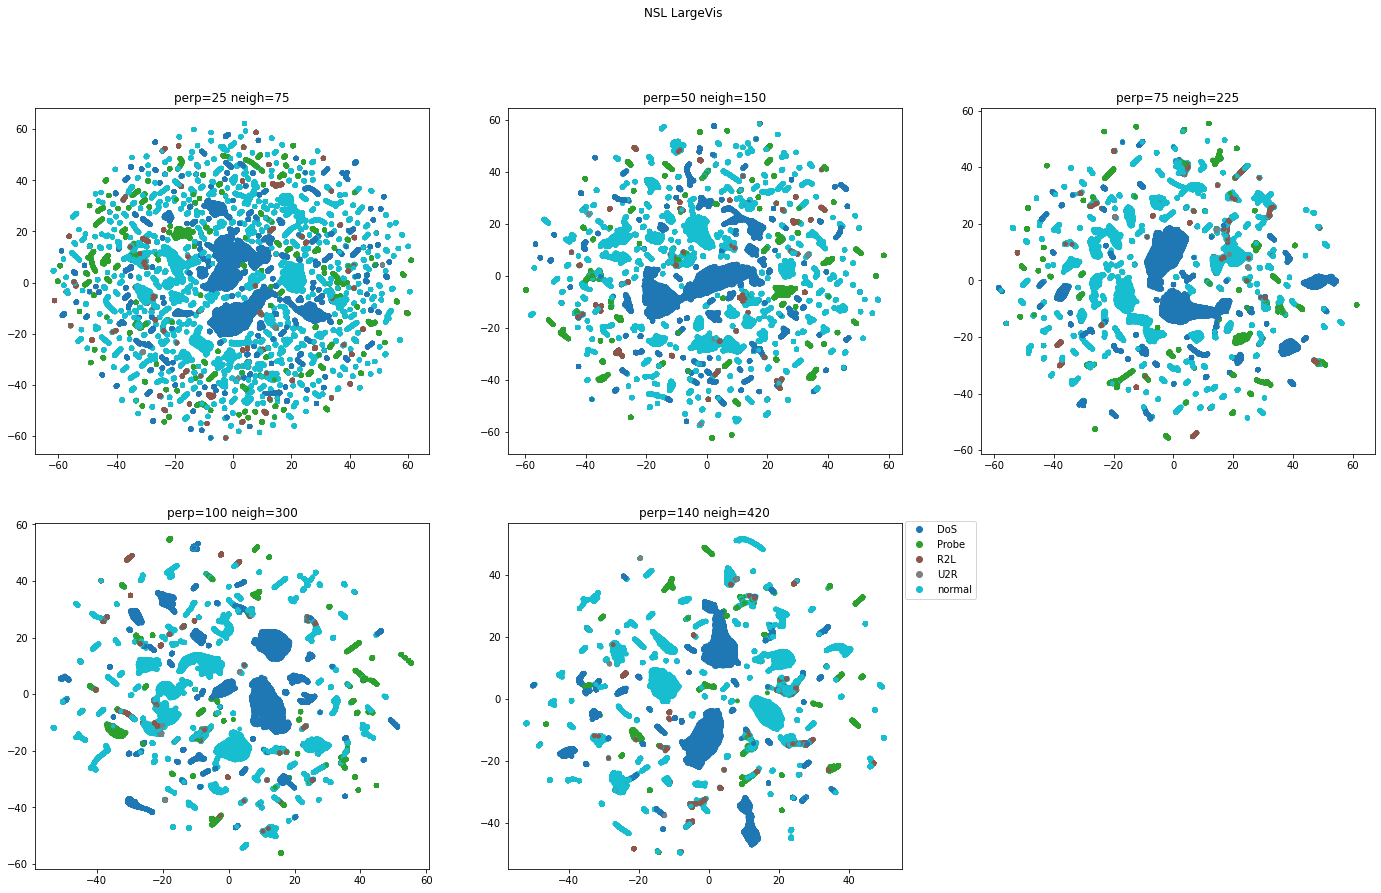

In [36]:
plot_2d(X_nsl_largevis, nsl_lables, titles_largevis_nsl, 'NSL LargeVis', labels=attack_classes, bbox_shift=1.2, rows=2, figsize=(24, 14))